<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="120" /></center>

# House Price prediction using - REGRESSION Techniques


<center><img src="https://github.com/shas2704/ML-Project-House-Price-Predeiction/blob/main/housing_price_pred2.jpg?raw=true" width="440" height="880" /></center>

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Introduction to Linear Regression](#section4)<br>
    - 4.1 [Preparing X and y using pandas](#section402)<br>
    - 4.2 [Splitting X and y into training and test datasets](#section403)<br>
    - 4.3 [Linear regression in scikit-learn](#section404)<br>
    - 4.4 [Interpreting Model Coefficients](#section405)<br>
    - 4.5 [Using the Model for Prediction](#section406)<br>
5. [Model evaluation](#section5)<br>
    - 5.1 [Model evaluation using metrics](#section501)<br>
    - 5.2 [Model Evaluation using Rsquared value.](#section502)<br>
6. [Feature Selection](#section6)<br>
7. [Conclusion](#section7)<br>

<a id=section1></a>

## 1. Problem Statement

- House is the basic necessity of every Individual. Purchasing it is one of the biggest decision of life. The biggest factor influencing the buying decision is the House price.

- For both Buyer and Seller the “right price” is important.

- We are going to work on the House data to make a model which will learn the best way to predict the most optimum price based on many features that impact decision of buyer and ultimately the price of the house.


We have a __house dataset__ having 1460 observation and 79 different variables. We have to create a model using the provided predictor variables for the prediction of sales price of house.

- We want to find a function that given input features/data __predicts the output sale price__ of the house.

- Visualize the __relationship__ between the _features_ and the _response_ using scatter plots.

<a id=section2></a>

## 2. Data Loading and Description

The house sale dataset captures house sale price wrt various features and properties of the house like -
- Plot size       
- Neighbourhood facilities - like landscape, proximity to rail/Roat etc   
- Interior features - like Number of rooms, size of rooms, bathrooms, kitchen features etc
- Faclities - like pool, garden, fireplace etc

Total 79 features are influencing the sale price of the house. We have to identify the major inflencing features affecting the price of the house.

__Importing Packages__

In [331]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)       # To display all the data in each column
pd.set_option('display.precision', 3)               # To display values only upto three decimal places.
pd.options.display.max_columns = 80                 # To display every column of the dataset in head()
pd.options.display.float_format = '{:.2f}'.format
#pd.options.display.max_rows = 80 # To display at least 80 rows for any query/command

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

from sklearn import metrics

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline
plt.rc("font", size=14)

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#### Importing the Dataset

In [332]:
hdata = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv', index_col=0)
hdata.head(10)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.00,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.00,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.00,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.00,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.00,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,nan,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.00,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.00,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.00,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.00,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.00,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


What are the **features**?


- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
-BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

What is the **target variable**?

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

<a id=section3></a>

## 3. Exploratory Data Analysis

In [333]:
hdata.shape

(1460, 80)

In [265]:
hdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [334]:
hdata.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


### Obervations
 - We do see missing values. 
 - We do skewness in many features as mean is away from 50 percentile value. We will check this further while doing EDA on these numerical features.
 

### Lets saggregate the categorical columns and Numrical columns.

- We will also find out the missing column list from each of the Numerical and Categorical feature lists

In [335]:
# Code to find the list of categorical feature in the data set
cat_feature = [feature for feature in hdata.columns if hdata[feature].dtype=='O']
print(len(cat_feature))
print(cat_feature)
print('\n')

# Code to find the list of categorical feature in the data set which have at least 1 missing value
cat_feature_missing = [feature for feature in hdata.columns if hdata[feature].isnull().sum()>0 and hdata[feature].dtype=='O']
print(len(cat_feature_missing))
print(cat_feature_missing)


43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


16
['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [336]:
# Code to find the list of numerical feature in the data set
num_feature = [feature for feature in hdata.columns if hdata[feature].dtype!='O']
print(len(num_feature))
print(num_feature)
print('\n')

# Code to find the list of numerical feature in the data set which have at least 1 missing value
num_feature_missing = [feature for feature in hdata.columns if hdata[feature].isnull().sum()>0 and hdata[feature].dtype!='O']
print(len(num_feature_missing))
print(num_feature_missing)


37
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


3
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


### Observations -

- There are 1460 **observations**, and 79 features in the dataset excluding the target variable.
- There are total __43 Categorical features__ of which __16 are missing data__.
- There are total __37 Numerical features__ of which __3 are missing data__.

#### Let us find out the missing values as __Percentage__

In [337]:
hdata.isnull().sum() # Returns the sum of null values of each column
#hdata.isnull().sum().sum() # returns the sum of all the columns having the null value
mv = hdata.isnull().sum().sort_values(ascending=False) #Arraging the missing columns in descending order
#print(nv)
pv = ((hdata.isnull().sum()/hdata.isnull().count())*100).sort_values(ascending=False) # calculating the %age of missinf values
#print(pv)

missingv = pd.concat([mv, pv], axis=1, keys=['Missing Val', 'Missing %age']) # creating a df with missing value counts and %age
print(missingv.head(20)) #printing top 20 missing values


              Missing Val  Missing %age
PoolQC               1453         99.52
MiscFeature          1406         96.30
Alley                1369         93.77
Fence                1179         80.75
FireplaceQu           690         47.26
LotFrontage           259         17.74
GarageType             81          5.55
GarageCond             81          5.55
GarageFinish           81          5.55
GarageQual             81          5.55
GarageYrBlt            81          5.55
BsmtFinType2           38          2.60
BsmtExposure           38          2.60
BsmtQual               37          2.53
BsmtCond               37          2.53
BsmtFinType1           37          2.53
MasVnrArea              8          0.55
MasVnrType              8          0.55
Electrical              1          0.07
RoofMatl                0          0.00


#### Checking the missing Values in the Data using heatmap

<AxesSubplot:ylabel='Id'>

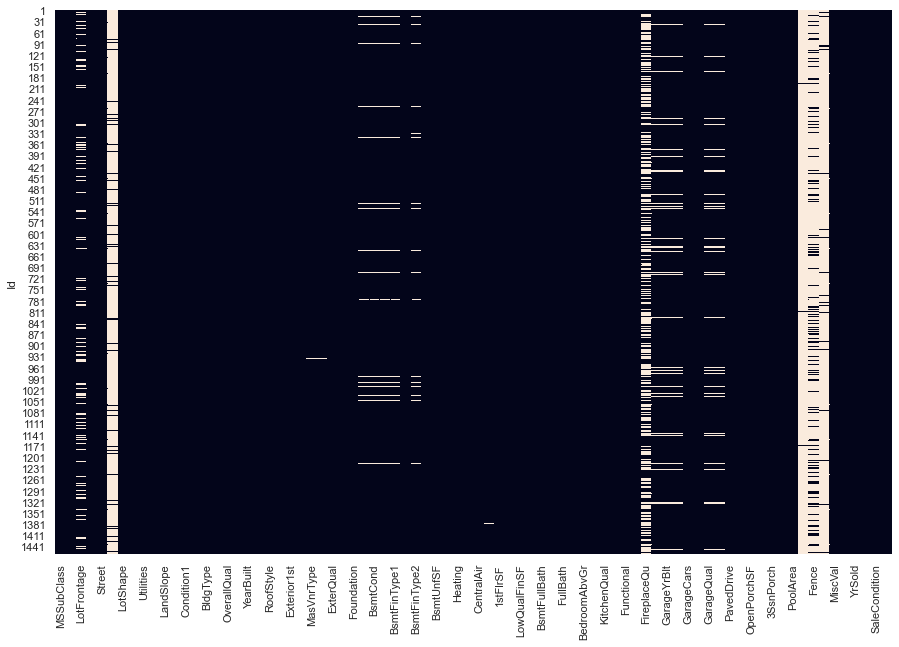

In [269]:
# Visual cross check
plt.figure(figsize=(15, 10)) # Setting the figure size for heatmap
sns.heatmap(hdata.isnull(), cbar=False) #colour bar not required, Ylabels ad , xlabels are automatic

We observe that there are __19 columns__ that are missing values. 

- Out of all the columns having missing values, __4 columns ('Alley', 'PoolQC', 'Fence', 'MiscFeature')__ have more then 80% missing values. So we will be dropping these columns.
- For remaining 13 columns missing value percentage is __below 50%__. Hence, we will be replacing using fol
 * If column is __categorical__, we will replace using __mode__ 
 * If column is __numerical__, we will replace the missing value with __median__ 

In [352]:
#dropping 4 columns with high missing values
hdata_clean = hdata.drop(columns = ['Alley', 'PoolQC', 'Fence', 'MiscFeature'])
hdata_clean.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.00,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.00,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.00,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.00,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.00,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
6,50,RL,85.00,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.00,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
7,20,RL,75.00,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.00,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.00,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
8,60,RL,nan,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.00,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.00,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
9,50,RM,51.00,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.00,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.00,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900


### Creating the function to fill the null values with either mode or median depending on type of columns
- We will replace all the Nan(Missing) values with mode of the feature for all categorical features. 

- Another approach would have been to replace all missing value with a new data for ex 'Empty' instead of modes. Both approaches have there advantages. To start with we will go ahead with former approach.

- For Numerical columns we will replace with median instead of mean to minimize the effect of outliers, if any.

- For Numerical columns we also need to check the distribution using EDA techniques. If it is normal distribution no firther processing will be required before Scaling. If not , then we will be using logarthmic transformation to take care f the skewness.

In [339]:

def fill_null_value(df, col_list):
    
    for colname in col_list:
       
        if(df[colname].dtype == 'O'):
            df[colname]  = df[colname].fillna(df[colname].mode()[0])          
            print('Categorical Column being filled is {} with mode.'.format(colname))
        else:
            df[colname]  = df[colname].fillna(df[colname].median())
            print('Numerical Column being filled is {} with median.'.format(colname))
            
    return

In [340]:
# Code to find the list of categorical feature in the data set which have at least 1 missing value
all_feature_missing = [feature for feature in hdata_clean.columns if hdata[feature].isnull().sum()>0]
print(len(all_feature_missing))
print(all_feature_missing)

15
['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


In [353]:
#Calling the function to fill all the feature with missing values.
fill_null_value(hdata_clean, all_feature_missing)

Numerical Column being filled is LotFrontage with median.
Categorical Column being filled is MasVnrType with mode.
Numerical Column being filled is MasVnrArea with median.
Categorical Column being filled is BsmtQual with mode.
Categorical Column being filled is BsmtCond with mode.
Categorical Column being filled is BsmtExposure with mode.
Categorical Column being filled is BsmtFinType1 with mode.
Categorical Column being filled is BsmtFinType2 with mode.
Categorical Column being filled is Electrical with mode.
Categorical Column being filled is FireplaceQu with mode.
Categorical Column being filled is GarageType with mode.
Numerical Column being filled is GarageYrBlt with median.
Categorical Column being filled is GarageFinish with mode.
Categorical Column being filled is GarageQual with mode.
Categorical Column being filled is GarageCond with mode.


In [354]:
# Alternative way to check if we are missing any value in features/columns
num_feature_missing = [feature for feature in hdata_clean.columns if hdata_clean[feature].isnull().sum()>0 and hdata_clean[feature].dtype!='O']
print(len(num_feature_missing))


0


### Data is now clean with no missing value

#### We will now saggregate the categorical and numerical columns for further processing.

- Categorical columns will be converted to Numerical usinf One Hot Encoding
- Numerical column will be Stadardized using Standard Scalar.
- Final dataFrame will be created after meging noth Numnerical and Categorical columns.

## Handling Categorical columns

In [355]:
# Sagrregating the Categorical and numerical columns form the cleaned up data
#numeric_columns = hdata_clean.select_dtypes(include=[np.number]).columns
#categorical_columns = hdata_clean.select_dtypes(exclude=[np.number]).columns

# Code to find the list of numerical feature in the data set
numeric_columns = [feature for feature in hdata_clean.columns if hdata_clean[feature].dtype!='O']
print(len(numeric_columns))
print(numeric_columns)

categorical_columns = [feature for feature in hdata_clean.columns if hdata_clean[feature].dtype=='O']
print(len(categorical_columns))
print(categorical_columns)



hdata_clean.head(10)

37
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
39
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.00,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.00,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.00,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.00,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.00,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
6,50,RL,85.00,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Gd,Attchd,1993.00,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
7,20,RL,75.00,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.00,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.00,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
8,60,RL,69.00,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.00,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.00,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
9,50,RM,51.00,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.00,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.00,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900


#### We can observe that we have 37 Numerical column and 39 Categorical columns

- Let us figure out unique category count for each of the Categorical columns

In [356]:
# Creating function to perform One Hot Encoding for all the cetegorical columns

def ohe_cat(df, cat_list):
    print(cat_list)
    
    for ftr in cat_list:
        dummy=pd.get_dummies(df[ftr], prefix=ftr,  drop_first=True) #OHE code
        df=pd.concat([df, dummy], axis=1) #Concatinating the new columns to original DF
        df.drop([ftr], axis=1, inplace=True) #droping the Original column from the DF
    
    return df



In [346]:
# Chcking the unique values for all the categorical columns.
for ftr in categorical_columns:
    print('Unique values of feature {} are {} and types are {}'.format(ftr,len(hdata_clean[ftr].unique()), hdata_clean[ftr].unique()))
#ohe_cat(hdata_clean,cat_list )

Unique values of feature MSZoning are 5 and types are ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values of feature Street are 2 and types are ['Pave' 'Grvl']
Unique values of feature LotShape are 4 and types are ['Reg' 'IR1' 'IR2' 'IR3']
Unique values of feature LandContour are 4 and types are ['Lvl' 'Bnk' 'Low' 'HLS']
Unique values of feature Utilities are 2 and types are ['AllPub' 'NoSeWa']
Unique values of feature LotConfig are 5 and types are ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Unique values of feature LandSlope are 3 and types are ['Gtl' 'Mod' 'Sev']
Unique values of feature Neighborhood are 25 and types are ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Unique values of feature Condition1 are 9 and types are ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Unique 

#### Observations 
- Except 3 categorical features all thvae less than 10 unique categories. Hence We can perform __OHE for all these columns__.
- 3 Categorical features having __more then 10 categories__ we can either use __OHE or Label Encoder__. For now will stick to OHE for these 3 columns too.

In [357]:
# Calling all ohe_cat function to perform one Hot Encoding for all the categorical features.
hdata_clean = ohe_cat(hdata_clean, categorical_columns)
hdata_clean

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,...,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.00,8450,7,5,2003,2003,196.00,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.00,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,...,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,20,80.00,9600,6,8,1976,1976,0.00,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.00,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,1,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60,68.00,11250,7,5,2001,2002,162.00,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.00,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,1,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,70,60.00,9550,7,5,1915,1970,0.00,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.00,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,1,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5,60,84.00,14260,8,5,2000,2000,350.00,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.00,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,1,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.00,7917,6,5,1999,2000,0.00,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.00,2,460,0,40,0,0,0,0,0,8,2007,175000,0,0,1,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1457,20,85.00,13175,6,6,1978,1988,119.00,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.00,2,500,349,0,0,0,0,0,0,2,2010,210000,0,0,1,...,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1458,70,66.00,9042,7,9,1941,2006,0.00,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.00,1,252,0,60,0,0,0,0,2500,5,2010,266500,0,0,1,...,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


### Observations - 
- 76 columns get converted to 276 columns now with OHE execution.

## Handling Numerical columns

### Calculating and plotting heatmap correlation

In [358]:
hdata_clean[numeric_columns].corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.00,-0.36,-0.14,0.03,-0.06,0.03,0.04,0.02,-0.07,-0.07,-0.14,-0.24,-0.25,0.31,0.05,0.07,0.00,-0.00,0.13,0.18,-0.02,0.28,0.04,-0.05,0.08,-0.04,-0.10,-0.01,-0.01,-0.01,-0.04,-0.03,0.01,-0.01,-0.01,-0.02,-0.08
LotFrontage,-0.36,1.00,0.30,0.23,-0.05,0.12,0.08,0.18,0.21,0.04,0.12,0.36,0.41,0.07,0.04,0.37,0.09,-0.01,0.18,0.05,0.24,-0.00,0.32,0.23,0.06,0.27,0.32,0.08,0.14,0.01,0.06,0.04,0.18,-0.00,0.01,0.01,0.33
LotArea,-0.14,0.30,1.00,0.11,-0.01,0.01,0.01,0.10,0.21,0.11,-0.00,0.26,0.30,0.05,0.00,0.26,0.16,0.05,0.13,0.01,0.12,-0.02,0.19,0.27,-0.03,0.15,0.18,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01,0.26
OverallQual,0.03,0.23,0.11,1.00,-0.09,0.57,0.55,0.41,0.24,-0.06,0.31,0.54,0.48,0.30,-0.03,0.59,0.11,-0.04,0.55,0.27,0.10,-0.18,0.43,0.40,0.51,0.60,0.56,0.24,0.31,-0.11,0.03,0.06,0.07,-0.03,0.07,-0.03,0.79
OverallCond,-0.06,-0.05,-0.01,-0.09,1.00,-0.38,0.07,-0.13,-0.05,0.04,-0.14,-0.17,-0.14,0.03,0.03,-0.08,-0.05,0.12,-0.19,-0.06,0.01,-0.09,-0.06,-0.02,-0.31,-0.19,-0.15,-0.00,-0.03,0.07,0.03,0.05,-0.00,0.07,-0.00,0.04,-0.08
YearBuilt,0.03,0.12,0.01,0.57,-0.38,1.00,0.59,0.31,0.25,-0.05,0.15,0.39,0.28,0.01,-0.18,0.20,0.19,-0.04,0.47,0.24,-0.07,-0.17,0.10,0.15,0.78,0.54,0.48,0.22,0.19,-0.39,0.03,-0.05,0.00,-0.03,0.01,-0.01,0.52
YearRemodAdd,0.04,0.08,0.01,0.55,0.07,0.59,1.00,0.18,0.13,-0.07,0.18,0.29,0.24,0.14,-0.06,0.29,0.12,-0.01,0.44,0.18,-0.04,-0.15,0.19,0.11,0.62,0.42,0.37,0.21,0.23,-0.19,0.05,-0.04,0.01,-0.01,0.02,0.04,0.51
MasVnrArea,0.02,0.18,0.10,0.41,-0.13,0.31,0.18,1.00,0.26,-0.07,0.11,0.36,0.34,0.17,-0.07,0.39,0.08,0.03,0.27,0.20,0.10,-0.04,0.28,0.25,0.24,0.36,0.37,0.16,0.12,-0.11,0.02,0.06,0.01,-0.03,-0.01,-0.01,0.47
BsmtFinSF1,-0.07,0.21,0.21,0.24,-0.05,0.25,0.13,0.26,1.00,-0.05,-0.50,0.52,0.45,-0.14,-0.06,0.21,0.65,0.07,0.06,0.00,-0.11,-0.08,0.04,0.26,0.15,0.22,0.30,0.20,0.11,-0.10,0.03,0.06,0.14,0.00,-0.02,0.01,0.39
BsmtFinSF2,-0.07,0.04,0.11,-0.06,0.04,-0.05,-0.07,-0.07,-0.05,1.00,-0.21,0.10,0.10,-0.10,0.01,-0.01,0.16,0.07,-0.08,-0.03,-0.02,-0.04,-0.04,0.05,-0.09,-0.04,-0.02,0.07,0.00,0.04,-0.03,0.09,0.04,0.00,-0.02,0.03,-0.01


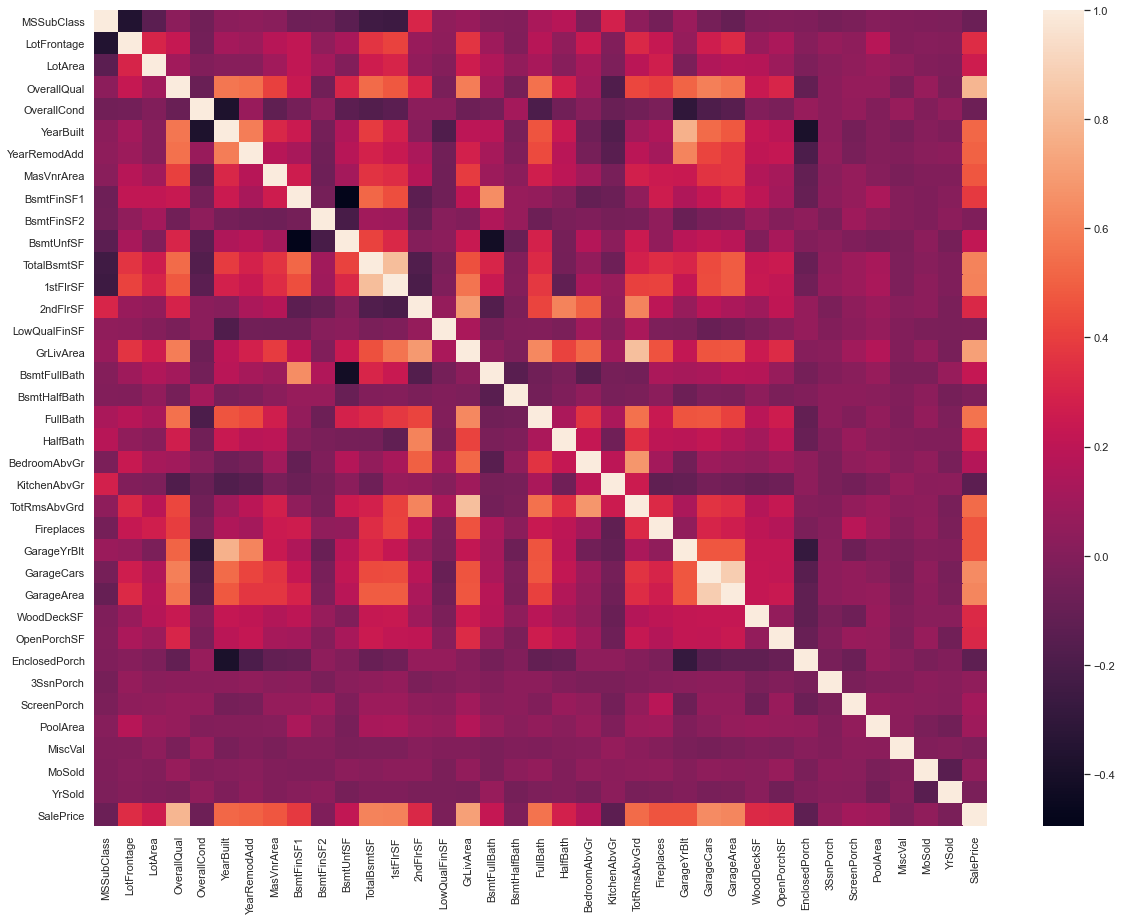

In [359]:
#Checking correlation for all numeric columns
plt.figure(figsize=(20, 15)) # Setting the figure size for heatmap
sns.heatmap( hdata_clean[numeric_columns].corr());


__Observation__

- The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. 

- correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. variables with __strong correlations__ are mostly probably candidates for __model builing__.

- Also we can see that values are not strongly -vely correlated as scale shown is from -0.5 to 1. 

- We do see some strong correlation between couple of features


### Lets check the data distribution and outliers for all the numerical columns using Barchart.
- If the numerical data are normally distributed then we don;t require any further processing for those columns.
- If they are skewed then we will have to do some knd of transformation to bring them to Gaussian distribution.

MSSubClass


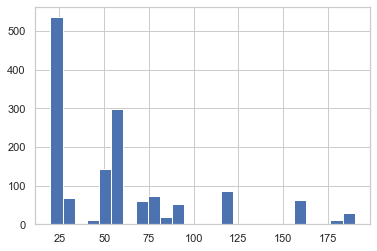

LotFrontage


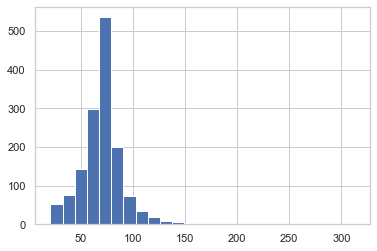

LotArea


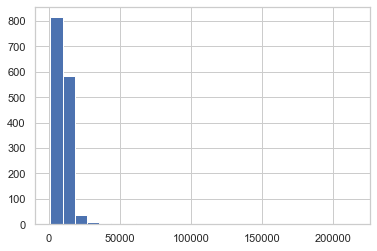

OverallQual


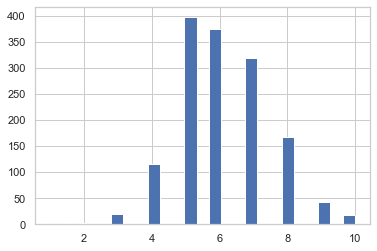

OverallCond


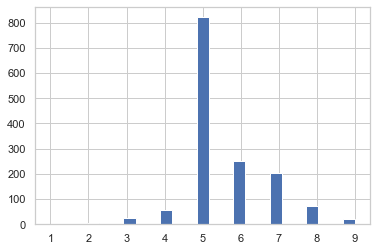

YearBuilt


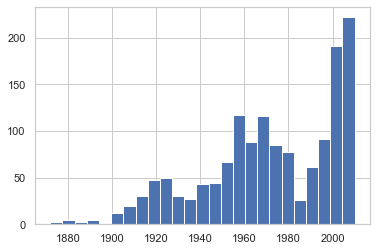

YearRemodAdd


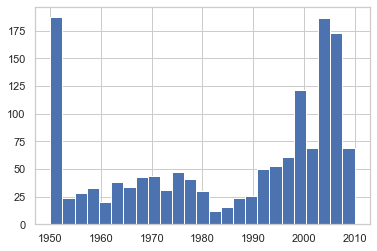

MasVnrArea


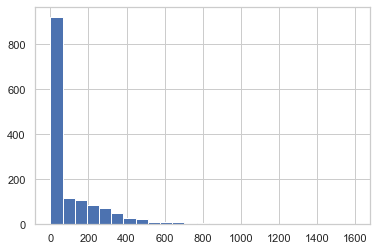

BsmtFinSF1


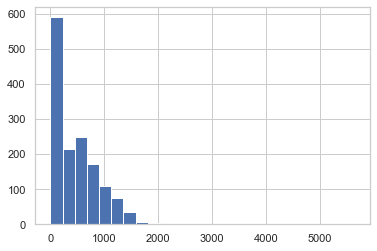

BsmtFinSF2


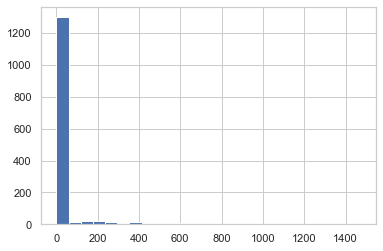

BsmtUnfSF


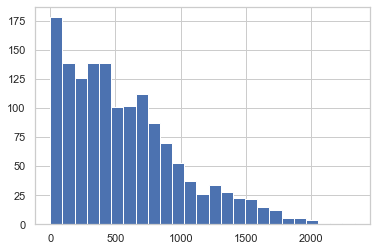

TotalBsmtSF


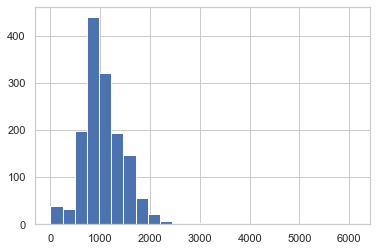

1stFlrSF


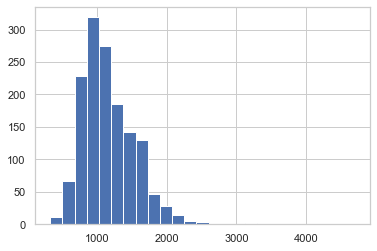

2ndFlrSF


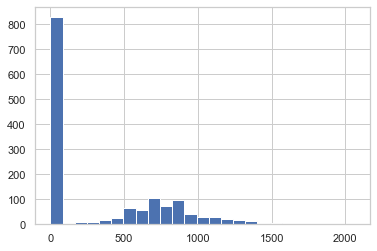

LowQualFinSF


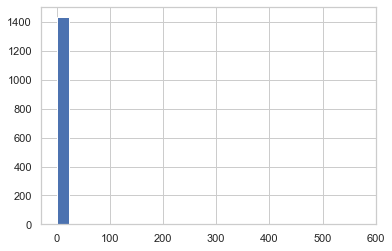

GrLivArea


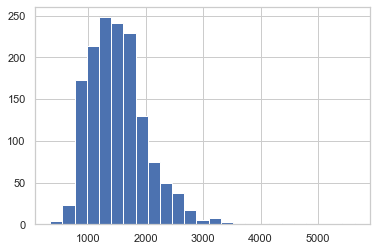

BsmtFullBath


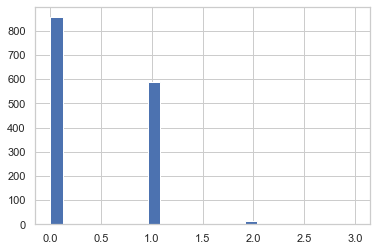

BsmtHalfBath


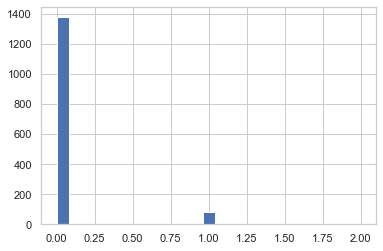

FullBath


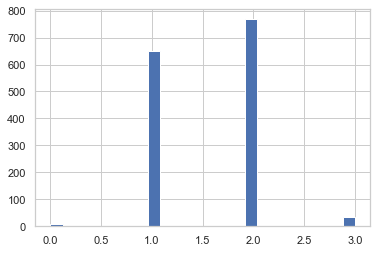

HalfBath


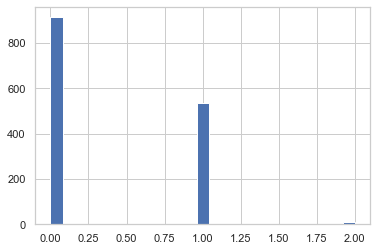

BedroomAbvGr


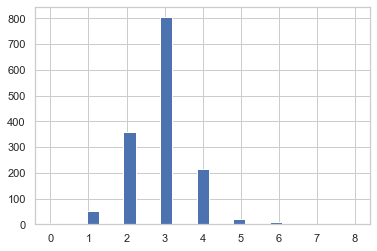

KitchenAbvGr


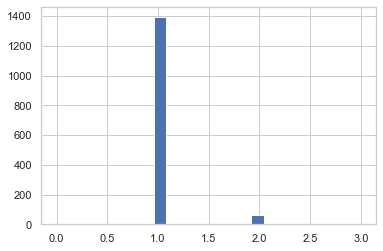

TotRmsAbvGrd


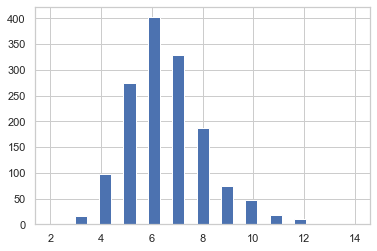

Fireplaces


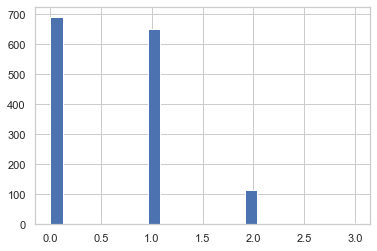

GarageYrBlt


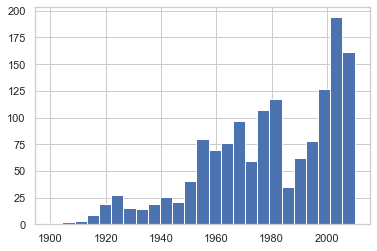

GarageCars


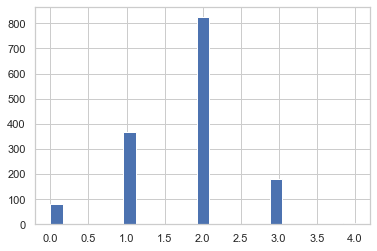

GarageArea


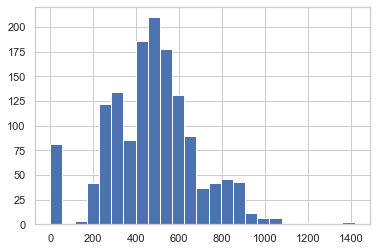

WoodDeckSF


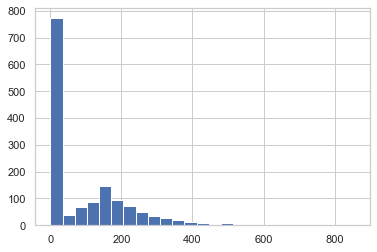

OpenPorchSF


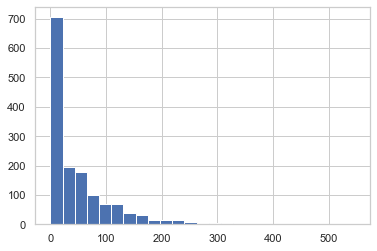

EnclosedPorch


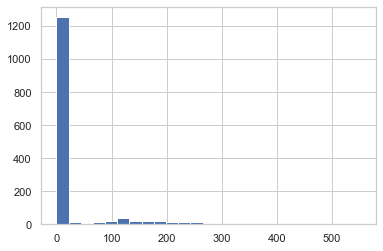

3SsnPorch


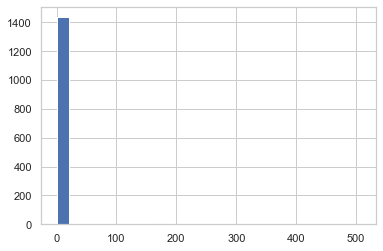

ScreenPorch


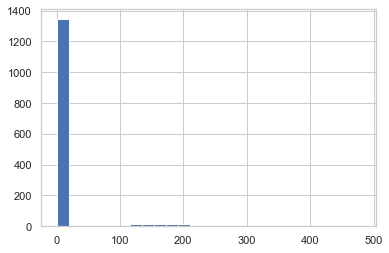

PoolArea


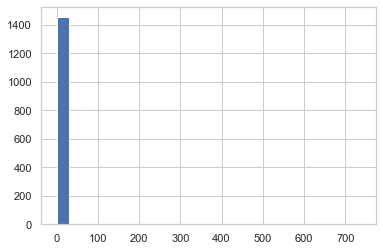

MiscVal


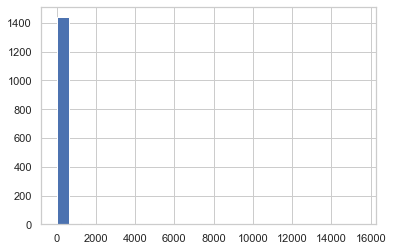

MoSold


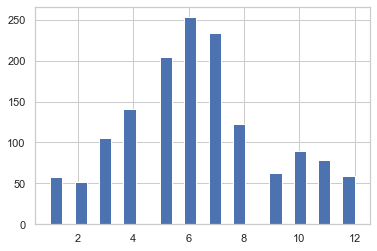

YrSold


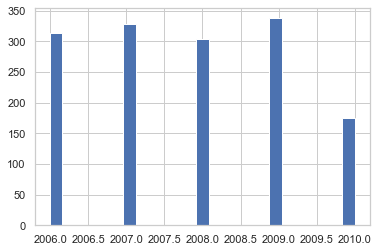

SalePrice


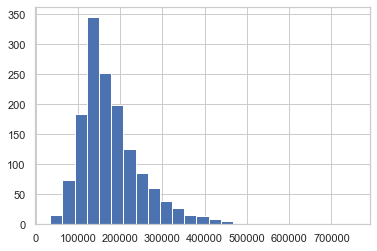

In [309]:
for ftr in numeric_columns:
    hdata_clean[ftr].hist(bins=25)
    print(ftr)
    #plt.xlabel(ftr)
    #plt.ylabel('Count')
    #plt.title(ftr)
    plt.show()
    

### Observations - 

- We see that many numerical features have limited numeric values ie they are having discrete values(countable) and few features are continious.

- We can __ignore the__ discete numeric variables.

- For contineous numeric features few of the feature are skewed. Hence for those we can apply lograthmathic tranformation.

In [317]:
#Identifying the features from numerical columns where log transformation can be applied
# basically we are checking for features from the numerical features where the value is not Zero for any index/row. 
#That means all the data is populated and is non zero.

log_ftr = [ftr for ftr in numeric_columns if len(hdata_clean[hdata_clean[ftr]==0]) ==0 ]
print(log_ftr)

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'MoSold',
 'YrSold',
 'SalePrice']

MSSubClass


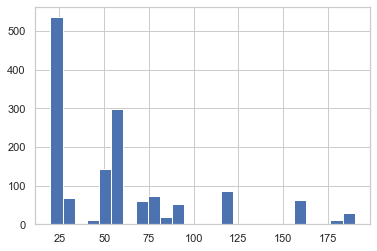

LotFrontage


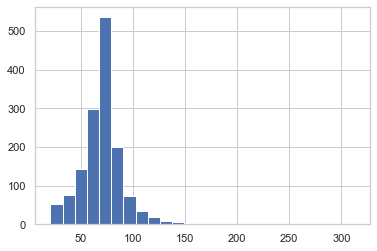

LotArea


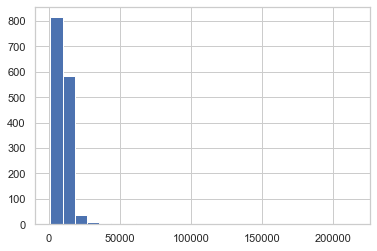

OverallQual


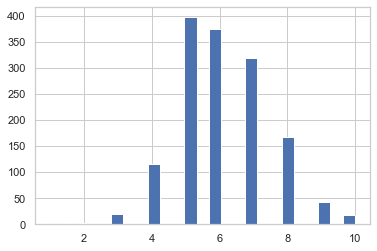

OverallCond


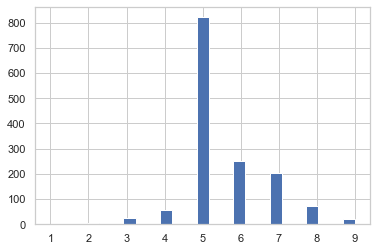

YearBuilt


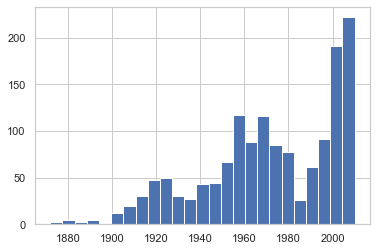

YearRemodAdd


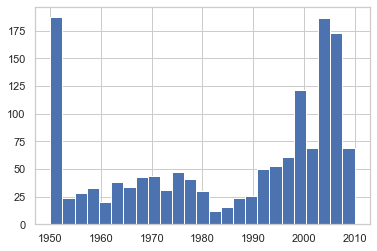

1stFlrSF


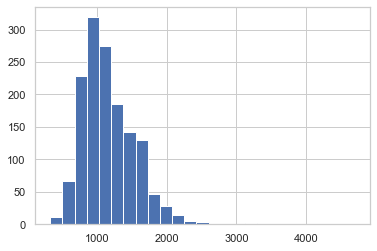

GrLivArea


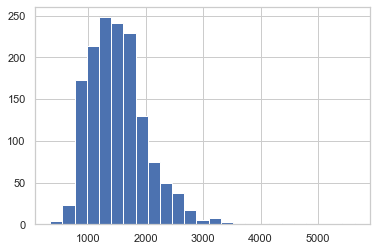

TotRmsAbvGrd


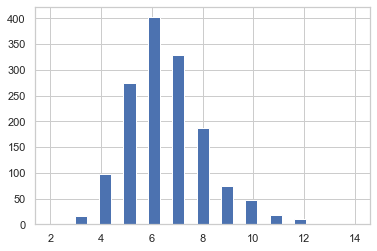

GarageYrBlt


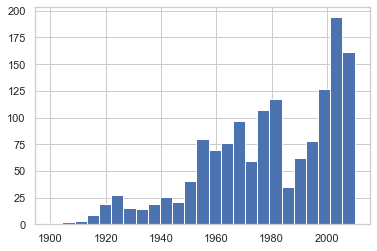

MoSold


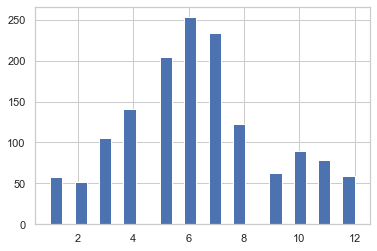

YrSold


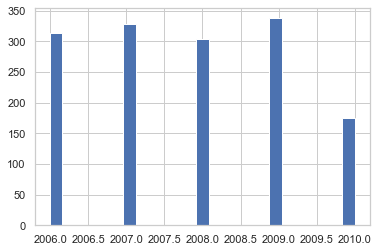

SalePrice


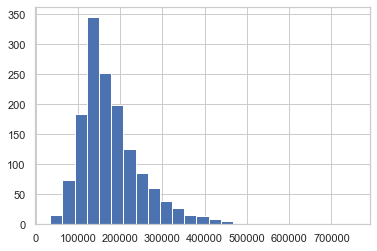

In [318]:
# Now we will use logarthmatic transformation on above columns to make them normalized. We will check the skwedness of above columns

for ftr in log_ftr:
    hdata_clean[ftr].hist(bins=25)
    print(ftr)
    #plt.xlabel(ftr)
    #plt.ylabel('Count')
    #plt.title(ftr)
    plt.show()
    

### Observations 

- We see that following columns are normally distributed __OverallQual, OverallCond, TotRmsAbvGrd, MoSold__. Hence these columns can be be ignored.


In [360]:
#Creating the final list for the log transformation
final_log_ftr = [ftr for ftr in log_ftr if ftr not in  ['OverallQual', 'OverallCond', 'TotRmsAbvGrd', 'MoSold']]
print(final_log_ftr)

['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', 'GrLivArea', 'GarageYrBlt', 'YrSold', 'SalePrice']


In [361]:
# Applying the log transformation on these columns
for ftr in final_log_ftr:
    hdata_clean[ftr]=np.log(hdata_clean[ftr])
    print('Feature transformed is {}'.format(ftr))

Feature transformed is MSSubClass
Feature transformed is LotFrontage
Feature transformed is LotArea
Feature transformed is YearBuilt
Feature transformed is YearRemodAdd
Feature transformed is 1stFlrSF
Feature transformed is GrLivArea
Feature transformed is GarageYrBlt
Feature transformed is YrSold
Feature transformed is SalePrice


In [362]:
hdata_clean.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,...,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.09,4.17,9.04,7,5,7.60,7.60,196.00,706,0,150,856,6.75,854,0,7.44,1,0,2,1,3,1,8,0,7.60,2,548,0,61,0,0,0,0,0,2,7.60,12.25,0,0,1,...,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3.00,4.38,9.17,6,8,7.59,7.59,0.00,978,0,284,1262,7.14,0,0,7.14,0,1,2,0,3,1,6,1,7.59,2,460,298,0,0,0,0,0,0,5,7.60,12.11,0,0,1,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4.09,4.22,9.33,7,5,7.60,7.60,162.00,486,0,434,920,6.82,866,0,7.49,1,0,2,1,3,1,6,1,7.60,2,608,0,42,0,0,0,0,0,9,7.60,12.32,0,0,1,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,4.25,4.09,9.16,7,5,7.56,7.59,0.00,216,0,540,756,6.87,756,0,7.45,1,0,1,0,3,1,7,1,7.60,3,642,0,35,272,0,0,0,0,2,7.60,11.85,0,0,1,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5,4.09,4.43,9.57,8,5,7.60,7.60,350.00,655,0,490,1145,7.04,1053,0,7.70,1,0,2,1,4,1,9,1,7.60,3,836,192,84,0,0,0,0,0,12,7.60,12.43,0,0,1,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
6,3.91,4.44,9.55,5,5,7.60,7.60,0.00,732,0,64,796,6.68,566,0,7.22,1,0,1,1,1,1,5,0,7.60,2,480,40,30,0,320,0,0,700,10,7.61,11.87,0,0,1,...,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
7,3.00,4.32,9.22,8,5,7.60,7.60,186.00,1369,0,317,1686,7.43,0,0,7.43,1,0,2,0,3,1,7,1,7.60,2,636,255,57,0,0,0,0,0,8,7.60,12.63,0,0,1,...,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
8,4.09,4.23,9.25,7,6,7.59,7.59,240.00,859,32,216,1107,7.01,983,0,7.64,1,0,2,1,3,1,7,2,7.59,2,484,235,204,228,0,0,0,350,11,7.61,12.21,0,0,1,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
9,3.91,3.93,8.72,7,5,7.57,7.58,0.00,0,0,952,952,6.93,752,0,7.48,0,0,2,0,2,2,8,2,7.57,2,468,90,0,205,0,0,0,0,4,7.60,11.77,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


### Let us now do the Scaling for all numerical columns/Features

- Note that we will not be scaling the categorical variables as they have already been transformed using One Hot Encoding.

In [379]:
print(len(numeric_columns))
print(numeric_columns)

37
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [395]:
#Let us now get all the numerical feature for which scaling needs to be done.
feature_scale=[feature for feature in numeric_columns if feature not in ['SalePrice']]
print(feature_scale)
print(len(feature_scale))
rem_ftr=[ftr for ftr in hdata_clean.columns if ftr not in feature_scale]
print(rem_ftr)
print(len(rem_ftr))


['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
36
['SalePrice', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neigh

In [408]:
#Creating hdata_cat for all categorical columns
hdata_cat=hdata_clean[rem_ftr].reset_index(drop=True)
hdata_cat.head()

,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,...,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,12.25,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,12.11,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,12.32,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,11.85,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,12.43,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [386]:
# Using Stanrd Scaler to Scale the numerical data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(hdata_clean[feature_scale])
#data = scaler.transform(hdata)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [388]:
data = scaler.transform(hdata_clean[feature_scale])

In [404]:
pd.DataFrame(data)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.43,-0.08,-0.13,0.65,-0.52,1.05,0.88,0.51,0.58,-0.29,-0.94,-0.46,-0.80,1.16,-0.12,0.53,1.11,-0.24,0.79,1.23,0.16,-0.21,0.91,-0.95,1.01,0.31,0.35,-0.75,0.22,-0.36,-0.12,-0.27,-0.07,-0.09,-1.60,0.14
1,-1.13,0.57,0.11,-0.07,2.18,0.16,-0.42,-0.57,1.17,-0.29,-0.64,0.47,0.42,-0.80,-0.12,-0.38,-0.82,3.95,0.79,-0.76,0.16,-0.21,-0.32,0.60,-0.10,0.31,-0.06,1.63,-0.70,-0.36,-0.12,-0.27,-0.07,-0.09,-0.49,-0.61
2,0.43,0.07,0.42,0.65,-0.52,0.98,0.83,0.33,0.09,-0.29,-0.30,-0.31,-0.58,1.19,-0.12,0.66,1.11,-0.24,0.79,1.23,0.16,-0.21,-0.32,0.60,0.93,0.31,0.63,-0.75,-0.07,-0.36,-0.12,-0.27,-0.07,-0.09,0.99,0.14
3,0.65,-0.33,0.10,0.65,-0.52,-1.87,-0.72,-0.57,-0.50,-0.29,-0.06,-0.69,-0.44,0.94,-0.12,0.54,1.11,-0.24,-1.03,-0.76,0.16,-0.21,0.30,0.60,0.81,1.65,0.79,-0.75,-0.18,4.09,-0.12,-0.27,-0.07,-0.09,-1.60,-1.37
4,0.43,0.72,0.88,1.37,-0.52,0.95,0.73,1.37,0.46,-0.29,-0.17,0.20,0.11,1.62,-0.12,1.28,1.11,-0.24,0.79,1.23,1.39,-0.21,1.53,0.60,0.89,1.65,1.70,0.78,0.56,-0.36,-0.12,-0.27,-0.07,-0.09,2.10,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.43,-0.22,-0.26,-0.07,-0.52,0.92,0.73,-0.57,-0.97,-0.29,0.87,-0.24,-0.47,0.80,-0.12,0.42,-0.82,-0.24,0.79,1.23,0.16,-0.21,0.30,0.60,0.85,0.31,-0.06,-0.75,-0.10,-0.36,-0.12,-0.27,-0.07,-0.09,0.62,-0.61
1456,-1.13,0.76,0.73,-0.07,0.38,0.23,0.16,0.09,0.76,0.72,0.05,1.10,1.98,-0.80,-0.12,1.11,1.11,-0.24,0.79,-0.76,0.16,-0.21,0.30,2.15,-0.02,0.31,0.13,2.03,-0.70,-0.36,-0.12,-0.27,-0.07,-0.09,-1.60,1.64
1457,0.65,-0.03,-0.00,0.65,3.08,-1.00,1.02,-0.57,-0.37,-0.29,0.70,0.22,0.23,1.84,-0.12,1.47,-0.82,-0.24,0.79,-0.76,1.39,-0.21,1.53,2.15,-1.57,-1.03,-1.03,-0.75,0.20,-0.36,-0.12,-0.27,-0.07,4.95,-0.49,1.64
1458,-1.13,0.07,0.14,-0.80,0.38,-0.70,0.54,-0.57,-0.87,6.09,-1.28,0.05,-0.08,-0.80,-0.12,-0.85,1.11,-0.24,-1.03,-0.76,-1.06,-0.21,-0.93,-0.95,-1.19,-1.03,-1.09,2.17,-0.70,1.47,-0.12,-0.27,-0.07,-0.09,-0.86,1.64


In [399]:
hdata_num = pd.DataFrame(data, columns=feature_scale)

In [403]:
print(hdata_num.shape)
hdata_num.head()


(1460, 36)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.43,-0.08,-0.13,0.65,-0.52,1.05,0.88,0.51,0.58,-0.29,-0.94,-0.46,-0.80,1.16,-0.12,0.53,1.11,-0.24,0.79,1.23,0.16,-0.21,0.91,-0.95,1.01,0.31,0.35,-0.75,0.22,-0.36,-0.12,-0.27,-0.07,-0.09,-1.60,0.14
1,-1.13,0.57,0.11,-0.07,2.18,0.16,-0.42,-0.57,1.17,-0.29,-0.64,0.47,0.42,-0.80,-0.12,-0.38,-0.82,3.95,0.79,-0.76,0.16,-0.21,-0.32,0.60,-0.10,0.31,-0.06,1.63,-0.70,-0.36,-0.12,-0.27,-0.07,-0.09,-0.49,-0.61
2,0.43,0.07,0.42,0.65,-0.52,0.98,0.83,0.33,0.09,-0.29,-0.30,-0.31,-0.58,1.19,-0.12,0.66,1.11,-0.24,0.79,1.23,0.16,-0.21,-0.32,0.60,0.93,0.31,0.63,-0.75,-0.07,-0.36,-0.12,-0.27,-0.07,-0.09,0.99,0.14
3,0.65,-0.33,0.10,0.65,-0.52,-1.87,-0.72,-0.57,-0.50,-0.29,-0.06,-0.69,-0.44,0.94,-0.12,0.54,1.11,-0.24,-1.03,-0.76,0.16,-0.21,0.30,0.60,0.81,1.65,0.79,-0.75,-0.18,4.09,-0.12,-0.27,-0.07,-0.09,-1.60,-1.37
4,0.43,0.72,0.88,1.37,-0.52,0.95,0.73,1.37,0.46,-0.29,-0.17,0.20,0.11,1.62,-0.12,1.28,1.11,-0.24,0.79,1.23,1.39,-0.21,1.53,0.60,0.89,1.65,1.70,0.78,0.56,-0.36,-0.12,-0.27,-0.07,-0.09,2.10,0.14


### Concatenating numerical transformed data and processed categorocal data to form final DataFrame. 

In [409]:
hdata_final=pd.concat([hdata_num, hdata_cat], axis=1)
hdata_final

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,...,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.43,-0.08,-0.13,0.65,-0.52,1.05,0.88,0.51,0.58,-0.29,-0.94,-0.46,-0.80,1.16,-0.12,0.53,1.11,-0.24,0.79,1.23,0.16,-0.21,0.91,-0.95,1.01,0.31,0.35,-0.75,0.22,-0.36,-0.12,-0.27,-0.07,-0.09,-1.60,0.14,12.25,0,0,1,...,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,-1.13,0.57,0.11,-0.07,2.18,0.16,-0.42,-0.57,1.17,-0.29,-0.64,0.47,0.42,-0.80,-0.12,-0.38,-0.82,3.95,0.79,-0.76,0.16,-0.21,-0.32,0.60,-0.10,0.31,-0.06,1.63,-0.70,-0.36,-0.12,-0.27,-0.07,-0.09,-0.49,-0.61,12.11,0,0,1,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0.43,0.07,0.42,0.65,-0.52,0.98,0.83,0.33,0.09,-0.29,-0.30,-0.31,-0.58,1.19,-0.12,0.66,1.11,-0.24,0.79,1.23,0.16,-0.21,-0.32,0.60,0.93,0.31,0.63,-0.75,-0.07,-0.36,-0.12,-0.27,-0.07,-0.09,0.99,0.14,12.32,0,0,1,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0.65,-0.33,0.10,0.65,-0.52,-1.87,-0.72,-0.57,-0.50,-0.29,-0.06,-0.69,-0.44,0.94,-0.12,0.54,1.11,-0.24,-1.03,-0.76,0.16,-0.21,0.30,0.60,0.81,1.65,0.79,-0.75,-0.18,4.09,-0.12,-0.27,-0.07,-0.09,-1.60,-1.37,11.85,0,0,1,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0.43,0.72,0.88,1.37,-0.52,0.95,0.73,1.37,0.46,-0.29,-0.17,0.20,0.11,1.62,-0.12,1.28,1.11,-0.24,0.79,1.23,1.39,-0.21,1.53,0.60,0.89,1.65,1.70,0.78,0.56,-0.36,-0.12,-0.27,-0.07,-0.09,2.10,0.14,12.43,0,0,1,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.43,-0.22,-0.26,-0.07,-0.52,0.92,0.73,-0.57,-0.97,-0.29,0.87,-0.24,-0.47,0.80,-0.12,0.42,-0.82,-0.24,0.79,1.23,0.16,-0.21,0.30,0.60,0.85,0.31,-0.06,-0.75,-0.10,-0.36,-0.12,-0.27,-0.07,-0.09,0.62,-0.61,12.07,0,0,1,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1456,-1.13,0.76,0.73,-0.07,0.38,0.23,0.16,0.09,0.76,0.72,0.05,1.10,1.98,-0.80,-0.12,1.11,1.11,-0.24,0.79,-0.76,0.16,-0.21,0.30,2.15,-0.02,0.31,0.13,2.03,-0.70,-0.36,-0.12,-0.27,-0.07,-0.09,-1.60,1.64,12.25,0,0,1,...,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1457,0.65,-0.03,-0.00,0.65,3.08,-1.00,1.02,-0.57,-0.37,-0.29,0.70,0.22,0.23,1.84,-0.12,1.47,-0.82,-0.24,0.79,-0.76,1.39,-0.21,1.53,2.15,-1.57,-1.03,-1.03,-0.75,0.20,-0.36,-0.12,-0.27,-0.07,4.95,-0.49,1.64,12.49,0,0,1,...,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1458,-1.13,0.07,0.14,-0.80,0.38,-0.70,0.54,-0.57,-0.87,6.09,-1.28,0.05,-0.08,-0.80,-0.12,-0.85,1.11,-0.24,-1.03,-0.76,-1.06,-0.21,-0.93,-0.95,-1.19,-1.03,-1.09,2.17,-0.70,1.47,-0.12,-0.27,-0.07,-0.09,-0.86,1.64,11.

In [410]:
#Saving the final processed data in a csv file for future reference
hdata_final.to_csv('House_data_processed.csv',index=False)

<a id=section4></a>

## 4. Introduction to Linear Regression

__Linear regression__ is a _basic_ and _commonly_ used type of __predictive analysis__.  The overall idea of regression is to examine two things: 
- Does a set of __predictor variables__ do a good job in predicting an __outcome__ (dependent) variable?  
- Which variables in particular are __significant predictors__ of the outcome variable, and in what way they do __impact__ the outcome variable?  

These regression estimates are used to explain the __relationship between one dependent variable and one or more independent variables__.  The simplest form of the regression equation with one dependent and one independent variable is defined by the formula :<br/>
$y = \beta_0 + \beta_1x$

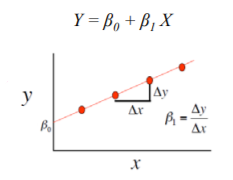

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x


Three major uses for __regression analysis__ are: 
- determining the __strength__ of predictors,
    - Typical questions are what is the strength of __relationship__ between _dose and effect_, _sales and marketing spending_, or _age and income_.
- __forecasting__ an effect, and
    - how much __additional sales income__ do I get for each additional $1000 spent on marketing?
- __trend__ forecasting.
    - what will the __price of house__ be in _6 months_?

<a id=section401></a>

<a id = sectionassumptions></a>

<a id=section402></a>

### 4.1 Preparing X and y using pandas

- __Standardization__. <br/>
Standardize features by removing the _mean_ and scaling to _unit standard deviation_.

- We are going to load the preprocessed data stored in the file for predicting the prices.

In [194]:
hdata_final=pd.read_csv('House_data_processed.csv')
print(hdata_final.shape)
hdata_final.head()

(1460, 237)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.430516,-0.075869,-0.133231,0.651479,-0.517200,1.045177,0.877540,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.803570,1.161852,-0.120242,0.529260,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,1.013144,0.311725,0.351000,-0.75

In [149]:
X = hdata_final.drop(['SalePrice'], axis=1 )                                    # use the list to select a subset of the original DataFrame-+

- Checking the type and shape of X.

In [150]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(1460, 236)


In [151]:
y = hdata_final.SalePrice
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

- Check the type and shape of y

In [129]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(1460,)


### 4.2 Splitting X and y into training and test datasets.

In [152]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [153]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)
print(y_test)
X_test

Train cases as below
X_train shape:  (1168, 236)
y_train shape:  (1168,)

Test cases as below
X_test shape:  (292, 236)
y_test shape:  (292,)
258     12.352335
267     12.097930
288     11.711776
649     11.344507
1233    11.863582
          ...    
163     11.544424
47      12.428015
1432    11.074421
98      11.326596
409     12.735965
Name: SalePrice, Length: 292, dtype: float64


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
258,0.430516,0.572424,0.613667,0.651479,-0.517200,0.980273,0.781720,0.381265,-0.181251,-0.288653,0.078692,-0.215319,-0.432742,1.104562,-0.120242,0.669733,-0.819964,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.296763,0.600495,0.931097,0.311725,0.425861,-0.752176,0.744

<a id=section404></a>

### 4.3 Linear regression in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating Root mean square error 
The code block given below shows how these steps are carried out:<br/>

``` from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    linreg.fit(X_train, y_train) 
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))```

In [154]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 
       
    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10,refit = True)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
        y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

        RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))
        
        R2_train = metrics.r2_score(y_train, y_pred_train)
        R2_test = metrics.r2_score(y_test, y_pred_test)
        print('R Square for training set is {}'.format(R2_train))
        print('R Square for test set is {}'.format(R2_test))


    return linreg

### Linear Regression Model without GridSearcCV
Note:  Linear Regression Model with GridSearcCV is implemented at Table of Contents: 8

In [155]:
linreg = linear_reg(X,y, True)

Mean cross-validated score of the best_estimator :  -9.280301968104721e+21
RMSE for the test set is 287012494508.3719
R Square for training set is 0.9171495558347156
R Square for test set is -4.746384424274797e+23


In [156]:

linreg = linear_reg(X,y)

### 4.4 Interpreting Model Coefficients

In [157]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

Intercept: 9.23140021716822
Coefficients: [-1.02727121e-02 -1.99248133e-03  4.74810849e-02  5.35297378e-02
  4.49416012e-02  6.03649713e-02  1.56135114e-02  5.36693165e-03
  3.97952717e+11  1.40753588e+11  3.85535829e+11 -3.82777256e+11
  2.37274170e-02  3.12347412e-02 -2.13623047e-04  1.08909607e-01
  1.05590820e-02  1.86157227e-03  6.97517395e-03  7.53784180e-03
  6.77680969e-03 -1.27105713e-02 -5.09643555e-03  1.14135742e-02
 -6.84547424e-03  1.01242065e-02  3.15856934e-02  1.05895996e-02
  4.49943542e-03  7.49111176e-03  1.92260742e-03  1.23901367e-02
  7.09152222e-03  6.25610352e-04 -2.53677368e-03 -3.07905674e-03
  4.25480366e-01  4.22261238e-01  3.87817383e-01  3.58528137e-01
 -2.98495293e-02  1.78985596e-02  1.03510380e-01  1.22947693e-02
  2.84919739e-02 -3.45457792e-02  2.85282135e-02 -3.34208488e-01
  2.16922760e-02 -2.64549255e-02 -8.41447711e-02 -1.63526535e-02
  4.43859100e-02 -1.14244461e-01 -6.28776550e-02 -8.37106705e-02
 -6.85129166e-02 -5.32922745e-02 -9.34371948e-02

### 4.5 Using the Model for Prediction

- We need an evaluation metric in order to compare our predictions with the actual values.

In [158]:
y_pred_train = linreg.predict(X_train) 
y_pred_test = linreg.predict(X_test)              # make predictions on the testing set

<a id=section5></a>

## 5. Model evaluation 

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
For example, if a model predicts that the price of apple is Rs75/kg, but the actual price of apple is Rs100/kg, then the error in prediction will be Rs25/kg.<br/>
Below are the types of error we will be calculating for our _linear regression model_:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error
- R Square(R2) Score

<a id=section501></a>

### 5.1 Model Evaluation using __metrics.__

__Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Computing the MAE for our Sales predictions

In [159]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.06136913967082058
MAE for test set is 138158212.55261758


__Mean Squared Error__ (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Computing the MSE for our Sales predictions

In [160]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.007709613774112058
MSE for test set is 2.584027760566567e+18


__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Computing the RMSE for our Sales price predictions

In [161]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.087804406347928
RMSE for test set is 1607491138.5654874


Comparing these metrics:

- __MAE__ is the easiest to understand, because it's the __average error.__ 
- __MSE__ is more popular than MAE, because MSE "punishes" larger errors.
- __RMSE__ is even more popular than MSE, because RMSE is _interpretable_ in the "y" units.
    - Easier to put in context as it's the same units as our response variable.

### 5.2 Model Evaluation using Rsquared value.

- There is one more method to evaluate linear regression model and that is by using the __Rsquared__ value.<br/>
- R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

- R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. But there is one shortcoming of Rsquare method and that is **R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting).

__R Square Score__ (R2) is the ratio of Explained Sum of Square(ESS) error and Total Sum of Square(TSS) error:

> __TSS = RSS + ESS__
>   ie   RSS/TSS + ESS/TSS = 1

> __R Square__ = 1 - RSS/TSS

RSS is resudual sum of Square error ie 
$$RSS = {\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
$$TSS = {\frac 1n\sum_{i=1}^n(y_i-\bar{y}_i)^2}$$

Hence,
$$RSqr = 1 - {\frac {\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}{\frac 1n\sum_{i=1}^n(y_i-\bar{y}_i)^2}}$$ 


Computing the R2 Score for our Sales price predictions. Value between 0 and 1. Higher the better.

In [193]:
R2_train = metrics.r2_score(y_train, y_pred_train)
R2_test = metrics.r2_score(y_test, y_pred_test)
print('R Square for training set is {}'.format(R2_train))
print('R Square for test set is {}'.format(R2_test))

R Square for training set is 0.9171495558347155
R Square for test set is 0.9092769508006995


In [163]:
yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.9504095306677776 0.9378387994514462


In [164]:
yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

-1.4888758261385896e+19 -7.877506643751446e+19


### Observation - 
We can see clearly that the model evaluation is pretty good for __Train data__ but is performing really bad for __Test Data__. This is a clear case of Ovrfitting. In order to get better result we will now be using Lasso Regression to select features that are important and are contibuting to the Dependent variable in a positive way.

- We will perform __Lasso Regression__ in next section and will rerun the linear regression model on the newly created dataset.

<a id=section6></a>

## 6. Feature Selection

At times some features do not contribute much to the accuracy of the model, in that case its better to discard those features.<br/> 
- We will apply Lasso regression on the transformed dataset and will create new dataset to run Linear Regression.
- This section can be independently executed on the transformed Data set form previous sections.


In [101]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [167]:
#Loading the transformed Dataset
dataset=pd.read_csv('House_data_processed.csv')
dataset.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.430516,-0.075869,-0.133231,0.651479,-0.517200,1.045177,0.877540,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.803570,1.161852,-0.120242,0.529260,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,1.013144,0.311725,0.351000,-0.75

In [168]:
dataset.shape


(1460, 237)

In [169]:
dataset['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [170]:
# Capture the dependent feature and [[]] makes sure the DataFrame is created.
y=dataset[['SalePrice']]
y

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1455,12.072541
1456,12.254863
1457,12.493130
1458,11.864462


In [171]:
## drop dependent feature from dataset and capture all the remaining Independent features in X_train
X=dataset.drop(['SalePrice'],axis=1)
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.430516,-0.075869,-0.133231,0.651479,-0.517200,1.045177,0.877540,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.803570,1.161852,-0.120242,0.529260,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,1.013144,0.311725,0.351000,-0.752176,0.216

In [172]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_root_mean_squared_error',cv=5)

lasso_regressor.fit(X, y)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.907885240535884, tolerance: 0.018912839723692884
  positive)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.2030633944110525, tolerance: 0.018002422128285192
  positive)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.102543089796378, tolerance: 0.01837384809099903
  positive)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

{'alpha': 0.001}
-0.12951158570667792


In [173]:
### Applying Feature Selection
# firstly, we specify the Lasso Regression model and select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected. 

#We have identified the best alpha as 0.001 from above Grid SEatch CV 

# Then we use the selectFromModel object from sklearn, which will select the features where coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.001, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.001, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [174]:
feature_sel_model.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True,  True, False,  True,
       False, False, False, False,  True,  True,  True,  True, False,
       False, False,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False,  True,

In [175]:

# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_ftr = X.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_ftr)))
print('features with coefficients shrank to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 236
selected features: 69
features with coefficients shrank to zero: 167


In [176]:
selected_ftr

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_FV',
       'MSZoning_RL', 'LandContour_Lvl', 'LotConfig_CulDSac',
       'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Condition1_Norm', 'HouseStyle_2Story',
       'Exterior1st_BrkFace', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'ExterQual_TA', 'ExterCond_TA',
       'Foundation_PConc', 'BsmtQual_G

In [177]:
X=X[selected_ftr]

In [178]:
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RL,LandContour_Lvl,LotConfig_CulDSac,Neighborhood_BrkSide,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Somerst,Neighborhood_StoneBr,Condition1_Norm,HouseStyle_2Story,Exterior1st_BrkFace,Exterior1st_MetalSd,Exterior1st_VinylSd,Exterior1st_Wd Sdng,ExterQual_TA,ExterCond_TA,Foundation_PConc,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_No,BsmtFinType1_GLQ,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,KitchenQual_Gd,KitchenQual_TA,Functional_Typ,GarageType_Detchd,GarageFinish_Unf,PavedDrive_Y,SaleType_New,SaleCondition_Normal
0,0.430516,-0.133231,0.651479,-0.517200,1.045177,0.877540,0.514104,-0.459303,-0.803570,1.161852,0.529260,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,1.013144,0.311725,-0.752176,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.139106,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1
1,-1.128983,0.113442,-0.071836,2.179628,0.163448,-0.424183,-0.570750,0.466465,0.418585,-0.795163,-0.381846,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,-0.101468,0.311725,1.626195,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614252,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1
2,0.430516,0.420061,0.651479,-0.517200,0.980273,0.829642,0.325915,-0.313369,-0.576560,1.189351,0.659675,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.931097,0.311725,-0.752176,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.139106,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1
3,0.649335,0.103347,0.651479,-0.517200,-1.873795,-0.715870,-0.570750,-0.687324,-0.439287,0.937276,0.541511,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,0.807872,1.650307,-0.752176,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367986,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,0,1,0,0,1,0,1,1,0,1,1,1,1,0,0
4,0.430516,0.878409,1.374795,-0.517200,0.947796,0.733774,1.366489,0.199680,0.112267,1.617877,1.282191,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,0.890043,1.650307,0.780197,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.139106,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1


In [179]:
#Creating the final df with dependent variable
hdata_lasso=pd.concat([X, y], axis=1)
hdata_lasso


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RL,LandContour_Lvl,LotConfig_CulDSac,Neighborhood_BrkSide,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Somerst,Neighborhood_StoneBr,Condition1_Norm,HouseStyle_2Story,Exterior1st_BrkFace,Exterior1st_MetalSd,Exterior1st_VinylSd,Exterior1st_Wd Sdng,ExterQual_TA,ExterCond_TA,Foundation_PConc,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_No,BsmtFinType1_GLQ,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,KitchenQual_Gd,KitchenQual_TA,Functional_Typ,GarageType_Detchd,GarageFinish_Unf,PavedDrive_Y,SaleType_New,SaleCondition_Normal,SalePrice
0,0.430516,-0.133231,0.651479,-0.517200,1.045177,0.877540,0.514104,-0.459303,-0.803570,1.161852,0.529260,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,1.013144,0.311725,-0.752176,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.139106,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,12.247694
1,-1.128983,0.113442,-0.071836,2.179628,0.163448,-0.424183,-0.570750,0.466465,0.418585,-0.795163,-0.381846,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,-0.101468,0.311725,1.626195,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614252,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1,12.109011
2,0.430516,0.420061,0.651479,-0.517200,0.980273,0.829642,0.325915,-0.313369,-0.576560,1.189351,0.659675,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.931097,0.311725,-0.752176,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.139106,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,12.317167
3,0.649335,0.103347,0.651479,-0.517200,-1.873795,-0.715870,-0.570750,-0.687324,-0.439287,0.937276,0.541511,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,0.807872,1.650307,-0.752176,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367986,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,0,1,0,0,1,0,1,1,0,1,1,1,1,0,0,11.849398
4,0.430516,0.878409,1.374795,-0.517200,0.947796,0.733774,1.366489,0.199680,0.112267,1.617877,1.282191,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,0.890043,1.650307,0.780197,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.139106,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.430516,-0.259188,-0.071836,-0.517200,0.915303,0.733774,-0.570750,-0.238122,-0.465607,0.795198,0.416680,-0.819964,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.296763,0.600495,0.848968,0.311725,-0.752176,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614252,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,12.072541
1456,-1.128983,0.725419,-0.071836,0.381743,0.229173,0.156543,0.087911,1.104925,1.981135,-0.795163,1.106592,1.107810,-0.241061,0.789741,-0.761621,0.163779,-0.211454,0.296763,2.152216,-0.018383,0.311725,2.033231,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.644698,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,1,12.254863
1457,0.649335,-0.002325,0.651479,3.078570,-0.997639,1.021092,-0.570750,0.215641,0.228338,1.844744,1.469942,-0.819964,-0.241061,0.789741,-0.

In [182]:
hdata_lasso

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RL,LandContour_Lvl,LotConfig_CulDSac,Neighborhood_BrkSide,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Somerst,Neighborhood_StoneBr,Condition1_Norm,HouseStyle_2Story,Exterior1st_BrkFace,Exterior1st_MetalSd,Exterior1st_VinylSd,Exterior1st_Wd Sdng,ExterQual_TA,ExterCond_TA,Foundation_PConc,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_No,BsmtFinType1_GLQ,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,KitchenQual_Gd,KitchenQual_TA,Functional_Typ,GarageType_Detchd,GarageFinish_Unf,PavedDrive_Y,SaleType_New,SaleCondition_Normal,SalePrice
0,0.430516,-0.133231,0.651479,-0.517200,1.045177,0.877540,0.514104,-0.459303,-0.803570,1.161852,0.529260,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,1.013144,0.311725,-0.752176,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.139106,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,12.247694
1,-1.128983,0.113442,-0.071836,2.179628,0.163448,-0.424183,-0.570750,0.466465,0.418585,-0.795163,-0.381846,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,-0.101468,0.311725,1.626195,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614252,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1,12.109011
2,0.430516,0.420061,0.651479,-0.517200,0.980273,0.829642,0.325915,-0.313369,-0.576560,1.189351,0.659675,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.931097,0.311725,-0.752176,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.139106,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,12.317167
3,0.649335,0.103347,0.651479,-0.517200,-1.873795,-0.715870,-0.570750,-0.687324,-0.439287,0.937276,0.541511,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,0.807872,1.650307,-0.752176,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367986,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,0,1,0,0,1,0,1,1,0,1,1,1,1,0,0,11.849398
4,0.430516,0.878409,1.374795,-0.517200,0.947796,0.733774,1.366489,0.199680,0.112267,1.617877,1.282191,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,0.890043,1.650307,0.780197,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.139106,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.430516,-0.259188,-0.071836,-0.517200,0.915303,0.733774,-0.570750,-0.238122,-0.465607,0.795198,0.416680,-0.819964,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.296763,0.600495,0.848968,0.311725,-0.752176,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614252,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,12.072541
1456,-1.128983,0.725419,-0.071836,0.381743,0.229173,0.156543,0.087911,1.104925,1.981135,-0.795163,1.106592,1.107810,-0.241061,0.789741,-0.761621,0.163779,-0.211454,0.296763,2.152216,-0.018383,0.311725,2.033231,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.644698,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,1,12.254863
1457,0.649335,-0.002325,0.651479,3.078570,-0.997639,1.021092,-0.570750,0.215641,0.228338,1.844744,1.469942,-0.819964,-0.241061,0.789741,-0.

In [180]:
#Saving the final processed data in a csv file for future reference
hdata_lasso.to_csv('Hdata_Lasso_processed.csv',index=False)

### Reading the newly lasso crated file for further processing 


In [183]:
dataset=pd.read_csv('Hdata_Lasso_processed.csv')
print(dataset.shape)
dataset.head()

(1460, 70)


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RL,LandContour_Lvl,LotConfig_CulDSac,Neighborhood_BrkSide,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Somerst,Neighborhood_StoneBr,Condition1_Norm,HouseStyle_2Story,Exterior1st_BrkFace,Exterior1st_MetalSd,Exterior1st_VinylSd,Exterior1st_Wd Sdng,ExterQual_TA,ExterCond_TA,Foundation_PConc,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_No,BsmtFinType1_GLQ,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,KitchenQual_Gd,KitchenQual_TA,Functional_Typ,GarageType_Detchd,GarageFinish_Unf,PavedDrive_Y,SaleType_New,SaleCondition_Normal,SalePrice
0,0.430516,-0.133231,0.651479,-0.517200,1.045177,0.877540,0.514104,-0.459303,-0.803570,1.161852,0.529260,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,1.013144,0.311725,-0.752176,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.139106,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,12.247694
1,-1.128983,0.113442,-0.071836,2.179628,0.163448,-0.424183,-0.570750,0.466465,0.418585,-0.795163,-0.381846,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,-0.101468,0.311725,1.626195,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614252,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1,12.109011
2,0.430516,0.420061,0.651479,-0.517200,0.980273,0.829642,0.325915,-0.313369,-0.576560,1.189351,0.659675,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.931097,0.311725,-0.752176,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.139106,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,12.317167
3,0.649335,0.103347,0.651479,-0.517200,-1.873795,-0.715870,-0.570750,-0.687324,-0.439287,0.937276,0.541511,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,0.807872,1.650307,-0.752176,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367986,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,0,1,0,0,1,0,1,1,0,1,1,1,1,0,0,11.849398
4,0.430516,0.878409,1.374795,-0.517200,0.947796,0.733774,1.366489,0.199680,0.112267,1.617877,1.282191,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,0.890043,1.650307,0.780197,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.139106,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,12.429216


In [184]:
X=dataset.drop(['SalePrice'],axis=1)
X

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RL,LandContour_Lvl,LotConfig_CulDSac,Neighborhood_BrkSide,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Somerst,Neighborhood_StoneBr,Condition1_Norm,HouseStyle_2Story,Exterior1st_BrkFace,Exterior1st_MetalSd,Exterior1st_VinylSd,Exterior1st_Wd Sdng,ExterQual_TA,ExterCond_TA,Foundation_PConc,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_No,BsmtFinType1_GLQ,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,KitchenQual_Gd,KitchenQual_TA,Functional_Typ,GarageType_Detchd,GarageFinish_Unf,PavedDrive_Y,SaleType_New,SaleCondition_Normal
0,0.430516,-0.133231,0.651479,-0.517200,1.045177,0.877540,0.514104,-0.459303,-0.803570,1.161852,0.529260,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,1.013144,0.311725,-0.752176,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.139106,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1
1,-1.128983,0.113442,-0.071836,2.179628,0.163448,-0.424183,-0.570750,0.466465,0.418585,-0.795163,-0.381846,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,-0.101468,0.311725,1.626195,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614252,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1
2,0.430516,0.420061,0.651479,-0.517200,0.980273,0.829642,0.325915,-0.313369,-0.576560,1.189351,0.659675,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.931097,0.311725,-0.752176,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.139106,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1
3,0.649335,0.103347,0.651479,-0.517200,-1.873795,-0.715870,-0.570750,-0.687324,-0.439287,0.937276,0.541511,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,0.807872,1.650307,-0.752176,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367986,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,0,1,0,0,1,0,1,1,0,1,1,1,1,0,0
4,0.430516,0.878409,1.374795,-0.517200,0.947796,0.733774,1.366489,0.199680,0.112267,1.617877,1.282191,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,0.890043,1.650307,0.780197,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.139106,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.430516,-0.259188,-0.071836,-0.517200,0.915303,0.733774,-0.570750,-0.238122,-0.465607,0.795198,0.416680,-0.819964,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.296763,0.600495,0.848968,0.311725,-0.752176,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614252,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1
1456,-1.128983,0.725419,-0.071836,0.381743,0.229173,0.156543,0.087911,1.104925,1.981135,-0.795163,1.106592,1.107810,-0.241061,0.789741,-0.761621,0.163779,-0.211454,0.296763,2.152216,-0.018383,0.311725,2.033231,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.644698,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,1
1457,0.649335,-0.002325,0.651479,3.078570,-0.997639,1.021092,-0.570750,0.215641,0.228338,1.844744,1.469942,-0.819964,-0.241061,0.789741,-0.761621,1.390023,-0.211454,1.527656,2.152216,-1.569222,-1.026858,-0.752176,-0.359325,

In [185]:
y=dataset[['SalePrice']]
y

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1455,12.072541
1456,12.254863
1457,12.493130
1458,11.864462


In [186]:
linreg = linear_reg(X,y)

In [187]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_) 

Intercept: [11.750646]
Coefficients: [[-0.0089586   0.03782769  0.07180431  0.05070427  0.05873014  0.01508222
  -0.00352707 -0.00890881  0.03867939  0.01347567  0.10999987  0.02355162
   0.00271732  0.01731038  0.00903994  0.00708045 -0.01573052  0.00466883
   0.01229015 -0.00135387  0.03904113  0.01554346  0.01304843  0.00126409
   0.0163814  -0.00773654 -0.00084504 -0.00119248 -0.00468423  0.03255985
   0.02341976  0.03192763  0.04117282  0.03343228  0.13096867 -0.08151876
  -0.07824815 -0.00849591  0.08544123  0.12393104 -0.02685544  0.07041285
   0.17945884  0.05916852 -0.02973063  0.0931279   0.02307952  0.02238195
   0.00607469 -0.01319082  0.03013273  0.03136896 -0.02635445 -0.02639529
   0.06520953 -0.01852609 -0.00257752 -0.05260684 -0.00840534 -0.01059261
   0.04689578 -0.05229196 -0.05373595  0.10271429  0.014853   -0.00856462
   0.01426166  0.10891148  0.0707273 ]]


In [188]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)
print(y_test)
X_test

Train cases as below
X_train shape:  (1168, 69)
y_train shape:  (1168, 1)

Test cases as below
X_test shape:  (292, 69)
y_test shape:  (292, 1)
      SalePrice
258   12.352335
267   12.097930
288   11.711776
649   11.344507
1233  11.863582
...         ...
163   11.544424
47    12.428015
1432  11.074421
98    11.326596
409   12.735965

[292 rows x 1 columns]


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RL,LandContour_Lvl,LotConfig_CulDSac,Neighborhood_BrkSide,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Somerst,Neighborhood_StoneBr,Condition1_Norm,HouseStyle_2Story,Exterior1st_BrkFace,Exterior1st_MetalSd,Exterior1st_VinylSd,Exterior1st_Wd Sdng,ExterQual_TA,ExterCond_TA,Foundation_PConc,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_No,BsmtFinType1_GLQ,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,KitchenQual_Gd,KitchenQual_TA,Functional_Typ,GarageType_Detchd,GarageFinish_Unf,PavedDrive_Y,SaleType_New,SaleCondition_Normal
258,0.430516,0.613667,0.651479,-0.517200,0.980273,0.781720,0.381265,-0.215319,-0.432742,1.104562,0.669733,-0.819964,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.296763,0.600495,0.931097,0.311725,-0.752176,-0.359325,8.243356,-0.270208,-0.068692,-0.087688,-0.489110,0.139106,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1
267,0.747272,-0.144704,-0.795151,2.179628,-1.064618,0.589791,-0.570750,-0.769412,-0.154439,0.854779,1.273993,-0.819964,-0.241061,0.789741,1.227585,1.390023,-0.211454,0.912210,0.600495,-1.653891,-1.026858,1.338875,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.250891,0.139106,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,1,0,1,1,1,1,0,1
288,-1.128983,0.157048,-0.795151,-0.517200,-0.133141,-0.862046,-0.399166,-0.400017,-0.645759,-0.795163,-1.395708,-0.819964,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,-0.934130,-0.951226,-0.351227,-1.026858,-0.752176,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.644698,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,1,1,1,1,0,1
649,1.990015,-2.981918,-1.518467,0.381743,-0.034127,-0.715870,-0.570750,-0.974631,-1.768715,-0.795163,-2.465403,1.107810,-0.241061,-1.026041,-0.761621,-2.288708,-0.211454,-2.165023,-0.951226,0.064617,-2.365440,-0.752176,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,-0.614252,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,1,0,1
1233,-1.128983,0.570434,-0.795151,-0.517200,-0.397917,-1.252943,0.425544,0.297729,0.228338,-0.795163,-0.563070,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,-0.318683,-0.951226,-0.811102,0.311725,-0.752176,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,1.644698,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.022146,-0.963393,-1.518467,0.381743,-0.497487,-1.399942,-0.570750,-0.400017,-0.709365,-0.795163,-1.456298,-0.819964,-0.241061,-1.026041,-0.761621,-2.288708,-0.211454,-1.549576,-0.951226,0.064617,-2.365440,-0.752176,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,-0.614252,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0,1,1,0,1
47,-1.128983,0.393414,1.374795,-0.517200,1.142413,1.021092,-0.570750,1.364870,1.274030,-0.795163,0.433024,-0.819964,-0.241061,0.789741,-0.761621,0.163779,-0.211454,0.296763,-0.951226,1.136061,1.650307,-0.752176,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.250891,-0.614252,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1
1432,-0.553418,0.341143,-1.518467,0.381743,-1.467947,1.068894,-0.570750,-0.915346,-0.416437,-0.795163,-1.177264,-0.819964,-0.241061,0.789741,-0.761621,1.390023,-0.211454,-0

In [189]:
y_pred_train = linreg.predict(X_train)  
y_pred_test = linreg.predict(X_test)  

In [190]:
import sklearn.metrics as metrics

MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))


R2_train = metrics.r2_score(y_train, y_pred_train)
R2_test = metrics.r2_score(y_test, y_pred_test)
print('R Square for training set is {}'.format(R2_train))
print('R Square for test set is {}'.format(R2_test))

MAE for training set is 0.07622826099707797
MAE for test set is 0.08959639941154704
MSE for training set is 0.012880396861115055
MSE for test set is 0.01574549559732171
RMSE for training set is 0.11349183609896817
RMSE for test set is 0.12548105672698853
R Square for training set is 0.9171495558347155
R Square for test set is 0.9092769508006995


### Now running all the steps of linear regression with this new Data_set with Grid Search CV option

In [192]:
linreg = linear_reg(X,y, True)

Mean cross-validated score of the best_estimator :  0.8947051212337469
RMSE for the test set is 0.12548105672698867
R Square for training set is 0.9171495558347155
R Square for test set is 0.9092769508006993


## 7. Conclusion

- 1st Model created with 236 features gave __excellent result__ for __Train dataset__. But for __Test Dataset__ result was very poor. A classic case of overfitting.

    - R squared Score for train data = 0.95
    - R squared Score for test data = -0.00148


- We then used __Lasso Regression__ for important __feature selection__. The data set reduced to __69 features from 236 features__ originally.

    - R squared Score for train data = 0.917
    - R squared Score for test data = 0.909
    

- The new model gave good R Square score for both __Train & Test data__.

- Hence our model is ready now for deployment to __predict house prices for new data with 90.9% accuracy__.


<a id=section7></a>